## Understanding Regression:
Exploring all the regression models and choosing the best out of them for the given dataset

Author : Pradeeshkumar U

Date   : 02-02-2025

Let's setup necessary packages:

In [457]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error

Let's import our dataset:

Here we are going to handle salary prediction dataset:

In [458]:
df = pd.read_csv('Dataset/Salary_Data.csv')

Let's explore the Data:

In [459]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [460]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [461]:
df.dropna(inplace=True)

In [462]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [463]:
df.shape

(6698, 6)

In [464]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [465]:
df['Job Title'].nunique()

191

In [466]:
df['Education Level'].nunique()

7

In [467]:
df['Gender'].nunique()

3

Visualizing the Dataset:

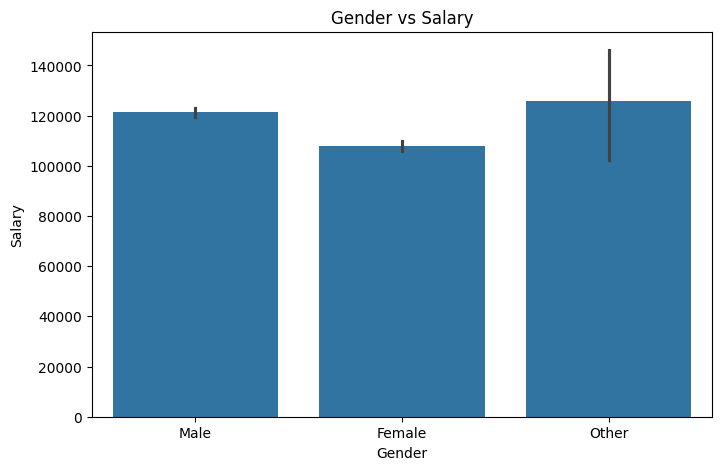

In [468]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='Salary',data=df)
plt.title('Gender vs Salary')
plt.show()

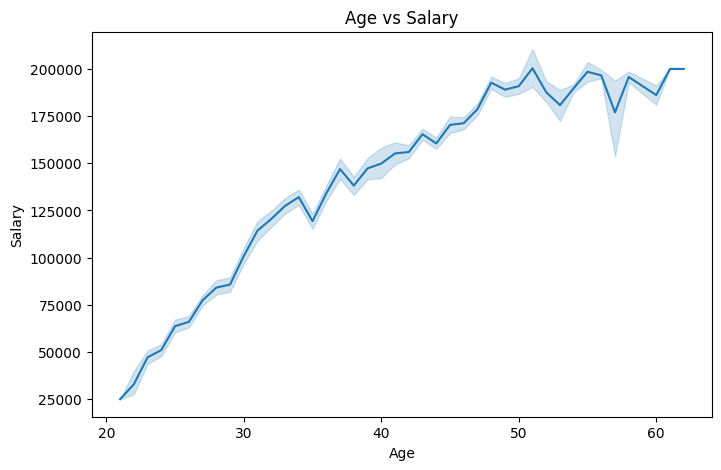

In [469]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Age',y='Salary',data=df)
plt.title('Age vs Salary')
plt.show()

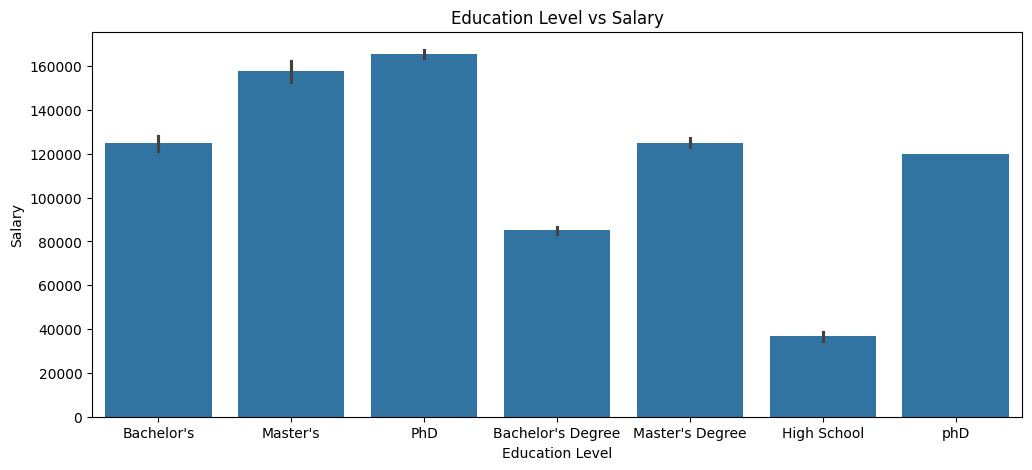

In [470]:
plt.figure(figsize=(12,5))
plt.tight_layout()
sns.barplot(x='Education Level',y='Salary',data=df)
plt.title('Education Level vs Salary')
plt.show()

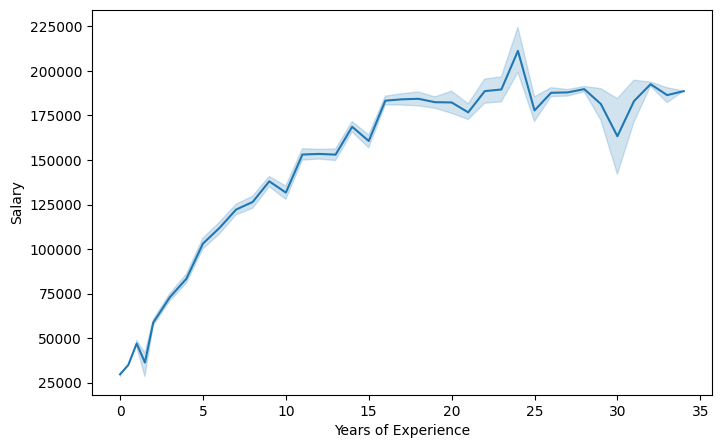

In [471]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Years of Experience',y='Salary',data=df)
plt.show()

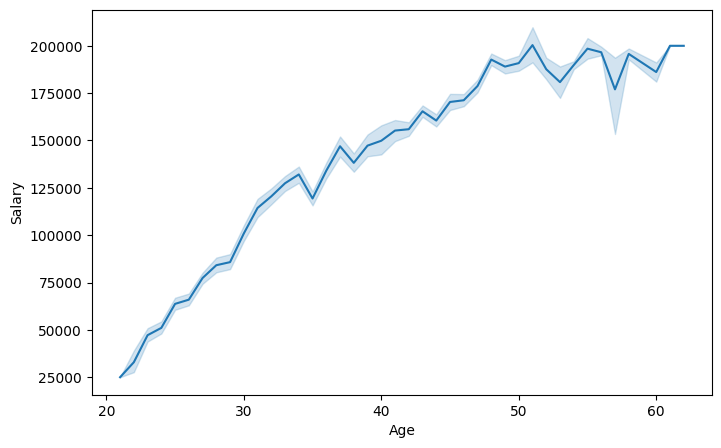

In [472]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Age',y='Salary',data=df)
plt.show()

Since we have 191 unique values in Job Title we use target encoding for it and count encoding for Gender and onehot encoding for Educational Level:

In [473]:
og_df = df.copy()

In [474]:
unique = df['Job Title'].unique()
mapping = {k:v+1 for v,k in enumerate(unique)}
df['Job Title'] = df['Job Title'].map(mapping)
df['Job Title'].nunique()

191

In [475]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0,'Other':2})

df['Gender'].value_counts()

Gender
1    3671
0    3013
2      14
Name: count, dtype: int64

Let's split the training and testing data before one hot encoding:

In [476]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [477]:
X

array([[32.0, 1, "Bachelor's", 1, 5.0],
       [28.0, 0, "Master's", 2, 3.0],
       [45.0, 1, 'PhD', 3, 15.0],
       ...,
       [30.0, 0, "Bachelor's Degree", 25, 4.0],
       [46.0, 1, "Master's Degree", 17, 14.0],
       [26.0, 0, 'High School', 39, 1.0]], dtype=object)

In [478]:
y = y.reshape(-1,1)
y

array([[ 90000.],
       [ 65000.],
       [150000.],
       ...,
       [ 55000.],
       [140000.],
       [ 35000.]])

In [479]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [480]:
X_train.shape

(5358, 5)

In [481]:
y_test.shape

(1340, 1)

In [482]:
ct = ColumnTransformer(transformers= [('Ed_Level',OneHotEncoder(),[2])],remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [483]:
X_train

array([[0.0, 0.0, 0.0, ..., 1, 105, 10.0],
       [0.0, 0.0, 0.0, ..., 0, 176, 10.0],
       [0.0, 0.0, 0.0, ..., 0, 65, 12.0],
       ...,
       [0.0, 1.0, 0.0, ..., 1, 129, 1.0],
       [0.0, 1.0, 0.0, ..., 1, 129, 1.0],
       [1.0, 0.0, 0.0, ..., 0, 2, 2.0]], dtype=object)

In [484]:
y_train.dtype

dtype('float64')

In [485]:
# X_train = X_train.astype('float')
# X_test = X_test.astype('float')

In [486]:
X_train[:5]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 39.0, 1, 105, 10.0],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 38.0, 0, 176, 10.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 35.0, 0, 65, 12.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0, 183, 1.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.0, 0, 1, 1.0]], dtype=object)

In [487]:
X_train.dtype

dtype('O')

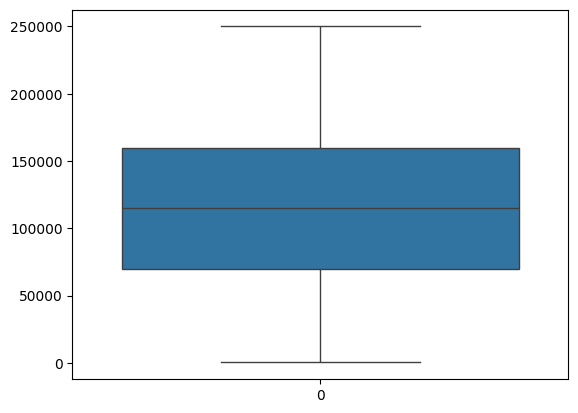

In [488]:
import seaborn as sns

sns.boxplot(y_train)
plt.show()

In [489]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_x.transform(X_test)

Let's create Multiple Linear Regression:

In [490]:
mul_lin_reg = LinearRegression()

mul_lin_reg.fit(X_train_scaled, y_train_scaled)

mul_lin_reg_pred = mul_lin_reg.predict(X_test_scaled)

In [491]:
mul_lin_reg.score(X_train,y_train)

-4.814958126911472

In [492]:
mul_lin_reg.score(X_test,y_test)

-4.614320405220867

In [493]:
r2_score(y_test, mul_lin_reg_pred)


-4.614194831201447

Let's create Polynomial Regression:

In [494]:
pol = PolynomialFeatures(degree = 4)

X_train_pol = pol.fit_transform(X_train_scaled)

X_test_pol = pol.transform(X_test_scaled)

pol_reg = LinearRegression()

pol_reg.fit(X_train_pol, y_train_scaled)

pol_reg_pred = pol_reg.predict(X_test_pol)

In [495]:
r2_score(y_test,scaler_y.inverse_transform(pol_reg_pred.reshape(-1,1)))

0.9243563214098592

Let's create Decision Tree Regression:

In [496]:
dec_tree_reg = DecisionTreeRegressor(random_state=42)

dec_tree_reg.fit(X_train_scaled, y_train_scaled)

dec_tree_reg_pred = dec_tree_reg.predict(X_test_scaled)

In [497]:
r2_score(y_test,scaler_y.inverse_transform(dec_tree_reg_pred.reshape(-1,1)))

0.9742522437804617

Let's create Random Forest Regression:

In [498]:
ran_for_reg = RandomForestRegressor(n_estimators=20,random_state=42)

ran_for_reg.fit(X_train_scaled, y_train_scaled)

ran_for_reg_pred = ran_for_reg.predict(X_test_scaled)

In [499]:
r2_score(y_test,scaler_y.inverse_transform(ran_for_reg_pred.reshape(-1,1)))

0.9815654351281373

Let's create SVR:

In [500]:
svr = SVR(kernel='rbf')

svr.fit(X_train_scaled, y_train_scaled)

svr_pred = svr.predict(X_test_scaled)

In [501]:
r2_score(y_test,scaler_y.inverse_transform(svr_pred.reshape(-1,1)))

0.9070731542093695

Let's Test these models by randomly giving some data and predicting the salary:

In [502]:
test_data  = [36,'Female','Bachelor\'s','Recruiter',9,100000]
test_data = pd.Series(test_data)

test_data[1]= 0 if test_data[1]=='Female' else 1 if test_data[1]=='Male' else 2
test_data[3] = mapping[test_data[3]]
X_test_data = test_data[:-1].values.reshape(1,-1)
X_test_data = ct.transform(X_test_data)
y_test_data = test_data[len(test_data)-1]

In [503]:
print(scaler_y.inverse_transform(mul_lin_reg.predict(scaler_x.transform(X_test_data)).reshape(1,-1)).round(2))

[[139970.19]]


In [504]:
print(scaler_y.inverse_transform(pol_reg.predict(pol.transform(scaler_x.transform(X_test_data))).reshape(1,-1)).round(2))

[[99706.1]]


In [505]:
print(scaler_y.inverse_transform(dec_tree_reg.predict(scaler_x.transform(X_test_data)).reshape(1,-1)).round(2))

[[100000.]]


In [506]:
print(scaler_y.inverse_transform(ran_for_reg.predict(scaler_x.transform(X_test_data)).reshape(1,-1)).round(2))

[[103750.]]


In [507]:
print(scaler_y.inverse_transform(svr.predict(scaler_x.transform(X_test_data)).reshape(1,-1)).round(2))

[[146390.72]]
